## Deploy your Machine Learning Model using Streamlit

In [28]:
variables = ['APARTMENTS_AVG','LIVINGAPARTMENTS_AVG','OCCUPATION_TYPE']

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
path = ''
df = pd.read_csv(path + '/application_train.csv')
df = df.sample(frac=0.1) # Take some records just to build a toy model
X_train, X_test, Y_train, Y_test = train_test_split(df[variables],df['TARGET'],random_state=0)

### Data pre-processing: fillna for numeric variables

In [30]:
# Impute with the mean of the training data
# Keep the same mean to impute the test data or any future data
APARTMENTS_AVG_MEAN = X_train['APARTMENTS_AVG'].mean()
APARTMENTS_AVG_MAX = X_train['APARTMENTS_AVG'].mean()
APARTMENTS_AVG_MIN = X_train['APARTMENTS_AVG'].min()
LIVINGAPARTMENTS_AVG_MEAN = X_train['LIVINGAPARTMENTS_AVG'].mean()
LIVINGAPARTMENTS_AVG_MAX = X_train['LIVINGAPARTMENTS_AVG'].max()
LIVINGAPARTMENTS_AVG_MIN = X_train['LIVINGAPARTMENTS_AVG'].min()

In [31]:
LIVINGAPARTMENTS_AVG_MIN, LIVINGAPARTMENTS_AVG_MAX

(0.0, 1.0)

In [32]:
APARTMENTS_AVG_MIN, APARTMENTS_AVG_MAX

(0.0, 0.11768214539007016)

In [33]:
mean_values = {'APARTMENTS_AVG': APARTMENTS_AVG_MEAN, 'LIVINGAPARTMENTS_AVG': LIVINGAPARTMENTS_AVG_MEAN}
X_train = X_train.fillna(value=mean_values)
X_test = X_test.fillna(value=mean_values)

### Data pre-processing: categorical variables

In [34]:
X_train['OCCUPATION_TYPE'].value_counts()

Laborers                 4117
Sales staff              2315
Core staff               2107
Managers                 1577
Drivers                  1420
High skill tech staff     860
Accountants               742
Medicine staff            633
Security staff            530
Cooking staff             456
Cleaning staff            350
Private service staff     185
Low-skill Laborers        160
Secretaries               111
Waiters/barmen staff       91
Realty agents              59
HR staff                   41
IT staff                   40
Name: OCCUPATION_TYPE, dtype: int64

In [35]:
OCCUPATION_list  = ['Laborers','Sales staff','Core staff','Managers','Drivers','High skill tech staff',
'Accountants','Medicine staff','Security staff','Cooking staff','Cleaning staff']

In [36]:
X_train['OCCUPATION_GRP'] = np.where(X_train['OCCUPATION_TYPE'].isin(OCCUPATION_list), X_train['OCCUPATION_TYPE'], 'OTHER')
X_test['OCCUPATION_GRP'] = np.where(X_test['OCCUPATION_TYPE'].isin(OCCUPATION_list), X_test['OCCUPATION_TYPE'], 'OTHER')
X_train = X_train.drop('OCCUPATION_TYPE',axis=1)
X_test = X_test.drop('OCCUPATION_TYPE',axis=1)

In [37]:
#X_train['OCCUPATION_GRP'] = X_train['OCCUPATION_GRP'].str.replace(' ','_')
#X_train['OCCUPATION_GRP'] = X_train['OCCUPATION_GRP'].str.replace('/','_')


In [38]:
X_train['OCCUPATION_GRP'].value_counts(dropna=False)

OTHER                    7956
Laborers                 4117
Sales staff              2315
Core staff               2107
Managers                 1577
Drivers                  1420
High skill tech staff     860
Accountants               742
Medicine staff            633
Security staff            530
Cooking staff             456
Cleaning staff            350
Name: OCCUPATION_GRP, dtype: int64

In [39]:
# Get_Dummy for One-Hot #
def getDummy(df,var):
    df[var] = df[var].str.replace(' ','_')
    df[var] = df[var].str.replace('/','_')
    dummies = pd.get_dummies(df[var])
    df2 = pd.concat([df, dummies], axis=1)
    df2 = df2.drop([var], axis=1)
    return(df2)
    
X_train = getDummy(X_train,'OCCUPATION_GRP')
X_test = getDummy(X_test,'OCCUPATION_GRP')

In [40]:
np.sort(X_train.columns)

array(['APARTMENTS_AVG', 'Accountants', 'Cleaning_staff', 'Cooking_staff',
       'Core_staff', 'Drivers', 'High_skill_tech_staff',
       'LIVINGAPARTMENTS_AVG', 'Laborers', 'Managers', 'Medicine_staff',
       'OTHER', 'Sales_staff', 'Security_staff'], dtype=object)

In [41]:
from sklearn.tree import DecisionTreeClassifier # for classification

# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
# Then, train the model.
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

<AxesSubplot:xlabel='feature'>

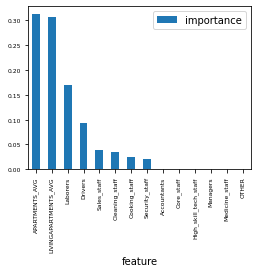

In [42]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.plot.bar(x='feature', figsize=(4,3),fontsize=6)

In [43]:
# Predict a few records
predictions = dtree.predict_proba(X_test[0:5])[:,1]
predictions

array([0.06263063, 0.06263063, 0.06263063, 0.10874704, 0.06263063])

## Save the model

In [52]:
import pickle 
# save the model to disk
modelname = path + '/toymodel.pkl'
pickle.dump(dtree, open(modelname, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(modelname, 'rb'))
predictions = loaded_model.predict_proba(X_test[0:1])[:,1]
predictions

array([0.06263063])

In [53]:
X_test[0:1]

,APARTMENTS_AVG,LIVINGAPARTMENTS_AVG,Accountants,Cleaning_staff,Cooking_staff,Core_staff,Drivers,High_skill_tech_staff,Laborers,Managers,Medicine_staff,OTHER,Sales_staff,Security_staff
154376,0.0186,0.101631,0,0,0,0,0,0,0,0,0,1,0,0
